In [1]:
# import dependency for this project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,   MinMaxScaler, LabelEncoder , OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# loading the dataset
df = pd.read_csv('Churn_Modeling.csv')

In [ ]:
df.head()
# print out the first 5 rows of the dataset to understand the structure and content of the data.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Preprocessing 

In [5]:
df.shape
# check the number of rows and columns in the dataset to get an idea of its size and dimensionality.

(10000, 14)

from this we can see that we have 10000 row and 14 columns 

In [6]:
df.describe()
# this will give us a statistical summary of the numerical columns in the dataset, including measures such as mean, standard deviation, minimum, and maximum values. It can help us understand the distribution and range of the data.

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [30]:
df.isnull().sum()
# check for missing values in the dataset.


CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
dtype: int64

we can see there is no misssing values in the dataset 

In [ ]:
df.info()
# this will provide information about the dataset, including the number of non-null values, data types of each column, and memory usage.
#  It can help us identify any missing values or data type issues in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
# drop the 'RowNumber', 'CustomerId', and 'Surname' columns from the dataset, as they are likely not relevant for the analysis or modeling process. 
# This will help reduce noise and improve the performance of our models.

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exporatory Data Analysis 

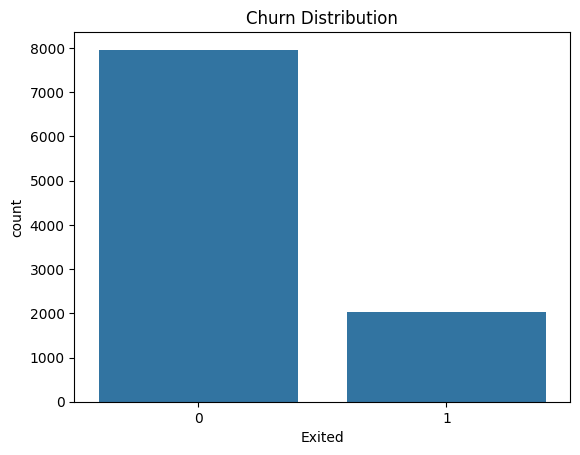

In [10]:
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution")
plt.show()

The "Stayed" Group (0): represent   roughly 8,000 customers. They are your active, loyal base.

The "Exited" Group (1): This represents the customers we  lost, totaling about 2,000 people.

In [ ]:
(df['Exited']
 .value_counts(normalize=True)
 .mul(100)
 .rename({0: "Stayed", 1: "Left"})
)
# this will give us the percentage distribution of the 'Exited' column, which indicates whether customers stayed or left. 
# It will help us understand the proportion of customers who churned versus those who stayed with the company.

Exited
Stayed    79.63
Left      20.37
Name: proportion, dtype: float64

we can see that 79% of people stayed back and 20% left 

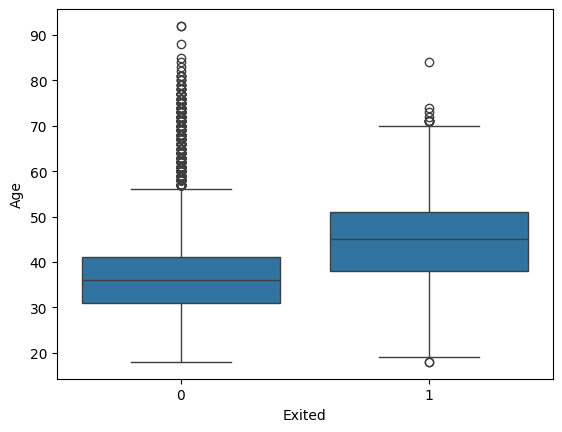

In [ ]:
sns.boxplot(x='Exited', y='Age', data=df)
plt.show()
# this will create a box plot to visualize the distribution of ages for customers who stayed (Exited=0) and
#  those who left (Exited=1). It can help us identify any differences in age distribution between the two groups.

The data suggests a positive correlation between age and churn. Older customers in this dataset appear more likely to leave than younger ones. While the "Stayed" group has many older individuals (the outliers), the "typical" customer who stays is notably younger than the "typical" customer who exits.

In [18]:
df['Geography'].value_counts()
# this will give us the count of customers in each geographical location (Geography) to understand the distribution of customers across different regions.

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

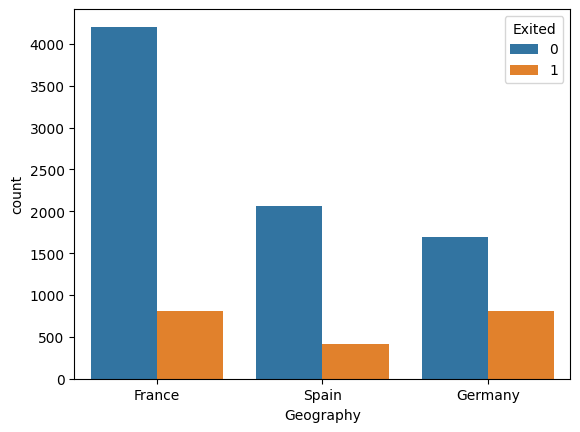

In [ ]:
sns.countplot(x='Geography', hue='Exited', data=df)
plt.show()
# this will create a count plot to visualize the distribution of customers across different geographical locations (Geography) and 
# how it relates to whether they stayed or left (Exited). It can help us identify any geographical patterns in customer churn.

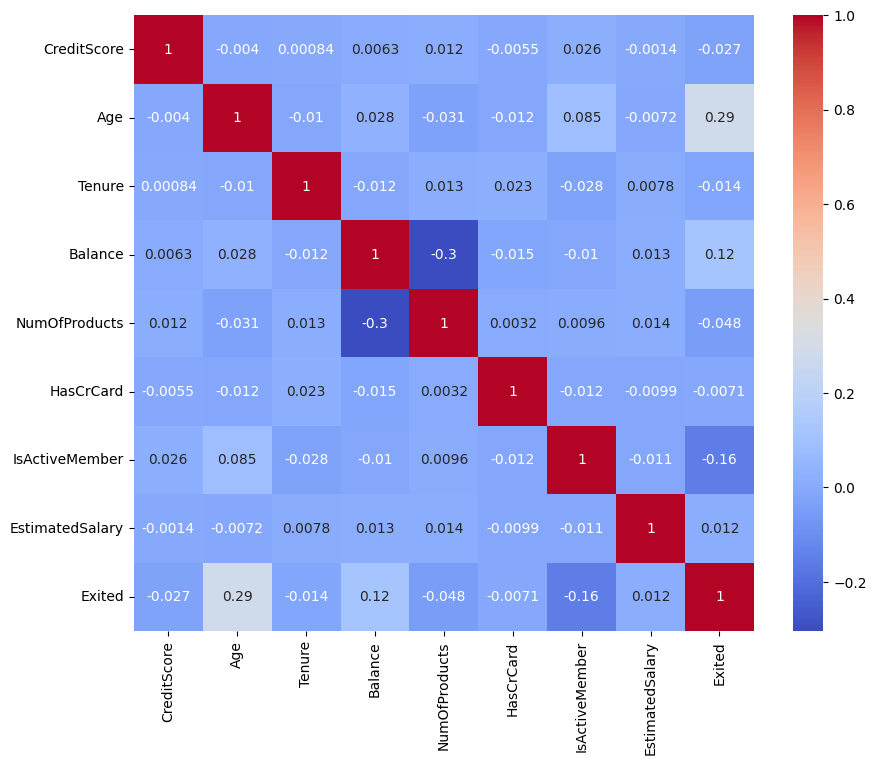

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm')
plt.show()
# this will create a heatmap to visualize the correlation between numerical features in the dataset. 
# It can help us identify any strong correlations that may exist between features, 
# which can be useful for feature selection and understanding relationships in the data.

Age is the biggest factor: Older customers are the most likely to leave the bank.

Activity keeps people around: Active members stay longer, while inactive ones are a high flight risk.

Money doesn't buy loyalty: Surprisingly, both Salary and Credit Score have almost zero impact on whether a customer stays or leaves.

High balances are risky: There is a slight trend showing that customers with more money in their accounts are actually more likely to churn.

In [24]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
# this will encode the 'Gender' column using label encoding, which converts categorical values into numerical values.
# This is necessary for machine learning algorithms that require numerical input.   

In [27]:
print(df['Gender'])

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int32


we can see that we change female to 0 and male to 1 using label encoding here order dose not mattter 

In [ ]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
# this will create dummy variables for the 'Geography' column, which is a categorical variable.
# The 'drop_first=True' parameter is used to avoid multicollinearity by dropping the first category.

In [29]:
df.head()   

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


## Data Slipting 

In [31]:
x = df.drop('Exited', axis=1)       
y = df['Exited']
# separate the features (x) and the target variable (y) for model training.

In [35]:
print(x)

      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       0   42       2       0.00              1          1   
1             608       0   41       1   83807.86              1          0   
2             502       0   42       8  159660.80              3          1   
3             699       0   39       1       0.00              2          0   
4             850       0   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       1   39       5       0.00              2          1   
9996          516       1   35      10   57369.61              1          1   
9997          709       0   36       7       0.00              1          0   
9998          772       1   42       3   75075.31              2          1   
9999          792       0   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_Ge

In [32]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


WE have divide our dataset into feature variable (x) and target variable (y)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# this will split the dataset into training and testing sets, with 80% of the data used for training and 20% for testing.
# The 'random_state=42' parameter ensures that the split is reproducible.

## Feature  Scalling 

In [ ]:
Scaler = StandardScaler() # this will create an instance of the StandardScaler, which is used for feature scaling.
x_train = Scaler.fit_transform(x_train) 
x_test = Scaler.transform(x_test)
# this will standardize the features in the training and testing sets using the StandardScaler.
# Standardization is a common preprocessing step that scales the features to have a mean of 0 and a standard deviation of 1, 
# which can improve the performance of many machine learning algorithms.

In [38]:
log_model = LogisticRegression() # this will create an instance of the LogisticRegression model
log_model.fit(x_train, y_train) # this will train a logistic regression model using the training data (x_train and y_train).

y_pred = log_model.predict(x_test) # this will use the trained logistic regression model to make predictions on the testing data (x_test) 

In [39]:
rf_model = RandomForestClassifier(random_state=42) # this will create an instance of the RandomForestClassifier model
rf_model.fit(x_train, y_train) # this will train a random forest classifier using the training data (x_train and y_train).

y_pred_rf = rf_model.predict(x_test) # this will use the trained random forest classifier to make predictions on the testing data (x_test)

## Model Evaluation  

In [ ]:
# Accuracy Score
print("Logistic Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Accuracy: 0.811
Random Forest Accuracy: 0.8665


In [ ]:
# Confusion Matrix for Logistic Regression
print(confusion_matrix(y_test, y_pred))

[[1543   64]
 [ 314   79]]


In [ ]:
# Confusion Matrix for Random Forest 
print(confusion_matrix(y_test, y_pred_rf))

[[1551   56]
 [ 211  182]]


In [43]:
# Classification Report for Logistic Regression
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [44]:
# Classification Report for Random Forest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

